In [ ]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  Using cached cmdstanpy-0.9.5-py3-none-any.whl (37 kB)
  Using cached pystan-3.10.0-py3-none-any.whl (13 kB)
  Using cached LunarCalendar-0.0.9-py2.py3-none-any.whl (18 kB)
  Using cached convertdate-2.4.0-py3-none-any.whl (47 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl (10 kB)
  Using cached PyMeeus-0.5.12-py3-none-any.whl
  Using cached ephem-4.1.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
  Using cached httpstan-4.13.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (45.5 MB)
  Using cached pysimdjson-6.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.8 MB)
  Using cached crashtest-0.3.1-py3-none-any.whl (7.0 kB)
  Using cached pastel-0.2.1-py2.py3-none-any.whl (6.0 kB)
  Using cached pylev-1.4.0-py2.py3-none-any.whl (6.1 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.w

In [ ]:
!pip install yfinance

In [ ]:
from prophet import Prophet
import yfinance as yf


In [ ]:
df=yf.download('GOOG',"2019-01-01","2024-04-26")


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df.head(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,50.828499,52.616001,50.785500,52.292500,52.233059,30652000
2019-01-03,52.049999,52.848999,50.703499,50.803001,50.745255,36822000
2019-01-04,51.629501,53.542000,51.370899,53.535500,53.474648,41878000


head kısmı indexte olduğu için onu bu şekilde almamız gerekiyor

In [ ]:
df=df["Close"]

In [ ]:
df.head(3)

Date
2019-01-02    52.292500
2019-01-03    50.803001
2019-01-04    53.535500
Name: Close, dtype: float64

In [ ]:
df=df.reset_index()

In [ ]:
df.columns=["ds","y"]

In [ ]:
df.head(3)

,ds,y
0,2019-01-02,52.292500
1,2019-01-03,50.803001
2,2019-01-04,53.535500


In [ ]:
model=Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfenzb8uf/gk8b26it.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfenzb8uf/w39l5kqp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29768', 'data', 'file=/tmp/tmpfenzb8uf/gk8b26it.json', 'init=/tmp/tmpfenzb8uf/w39l5kqp.json', 'output', 'file=/tmp/tmpfenzb8uf/prophet_modelmr9wwsb5/prophet_model-20240724104407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:44:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
gelecek=model.make_future_dataframe(360)
tahmin=model.predict(gelecek)

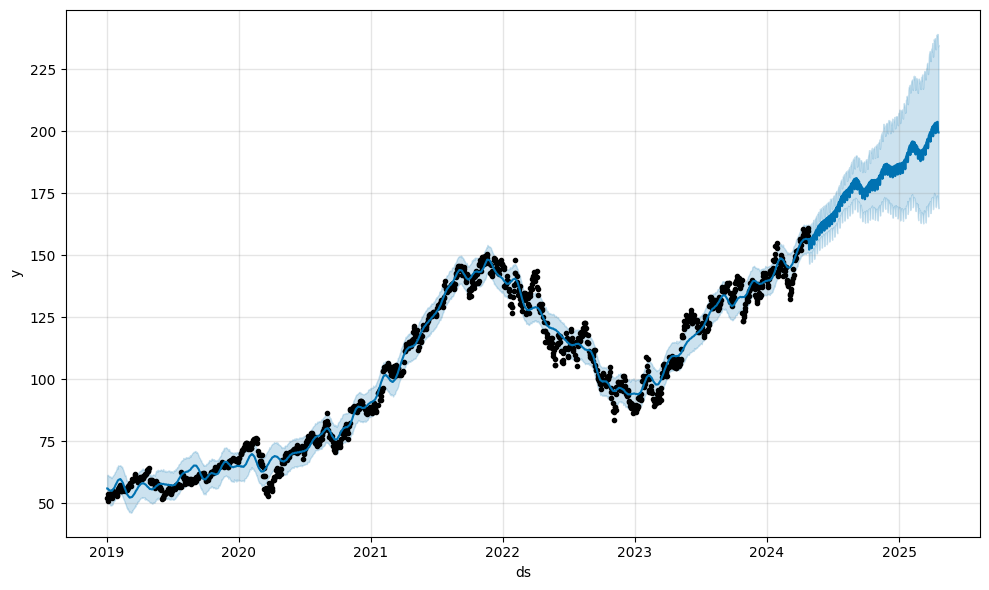

In [ ]:
model.plot(tahmin);

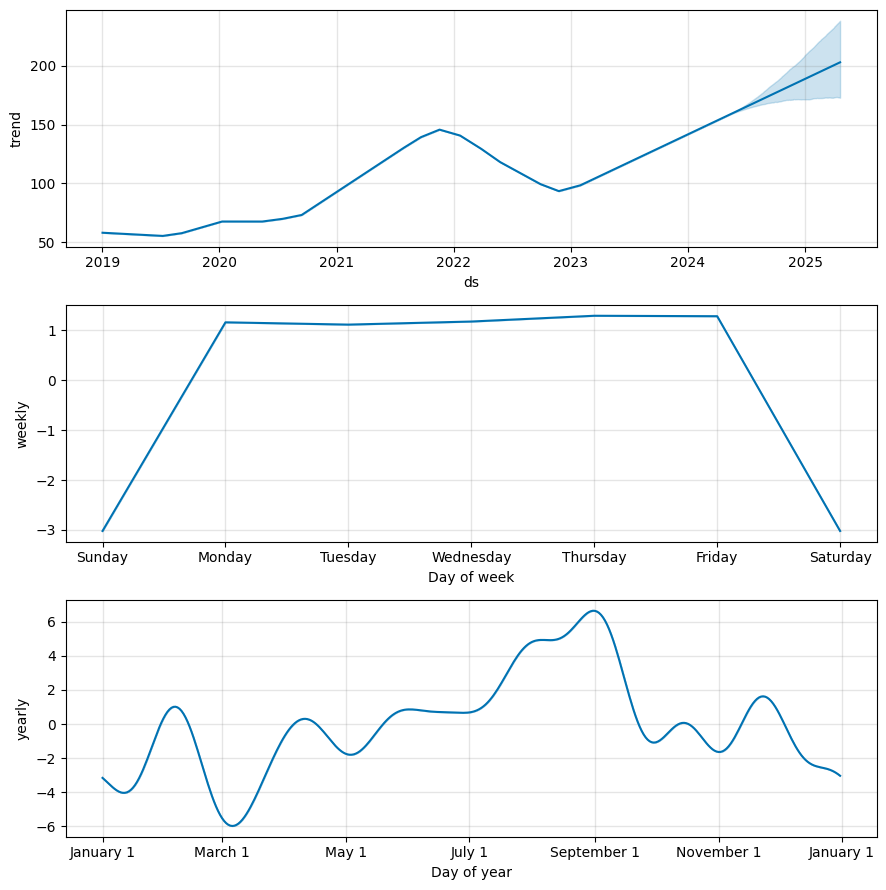

In [ ]:
model.plot_components(tahmin);